# **AICP EDA Internship Task Week 6**

**Birth Rate Analysis**

Let’s take a look at the freely available data on births in the United States, provided by the Centers for Disease Control (CDC). Find Dataset “births.csv” and implement EDA techniques.


Q.1: **Add a new column “Decade” by calculating. For example 1969 will be 1960, 1988 will 1980 etc**.

In [56]:
import pandas as pd

# Load the data
df = pd.read_csv('/content/births with decades.csv')

# Define the function to calculate the decade
def calculate_decade(year):
    return (year // 10) * 10

# Apply the function to the 'year' column
df['Decade'] = df['year'].apply(calculate_decade)

# Save the updated DataFrame
df.to_csv('/content/births with decades.csv', index=False)

Q.2: **Show the descriptive statistics of the data.**


In [57]:
# Calculate descriptive statistics for the dataset
descriptive_stats = df.describe()

# Save the descriptive statistics to a CSV file
descriptive_stats.to_csv('/content/births.csv')

# Return the descriptive statistics for display
descriptive_stats


,year,month,day,births,Decade
count,15547.000000,15547.000000,15067.000000,15547.000000,15547.000000
mean,1979.037435,6.515919,17.769894,9762.293561,1974.544285
std,6.728340,3.449632,15.284034,28552.465810,6.789583
min,1969.000000,1.000000,1.000000,1.000000,1960.000000
25%,1974.000000,4.000000,8.000000,4358.000000,1970.000000
50%,1979.000000,7.000000,16.000000,4814.000000,1970.000000
75%,1984.000000,10.000000,24.000000,5289.500000,1980.000000
max,2008.000000,12.000000,99.000000,199622.000000,2000.000000


Q.3: **Check if your data contains any missing values**


In [58]:
# Check for missing values
missing_values = df.isnull().sum()

# Return the number of missing values for each column
missing_values

year        0
month       0
day       480
gender      0
births      0
Decade      0
dtype: int64

Q.4: **What is the trend of male & female births every decade?**


gender,F,M
Decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


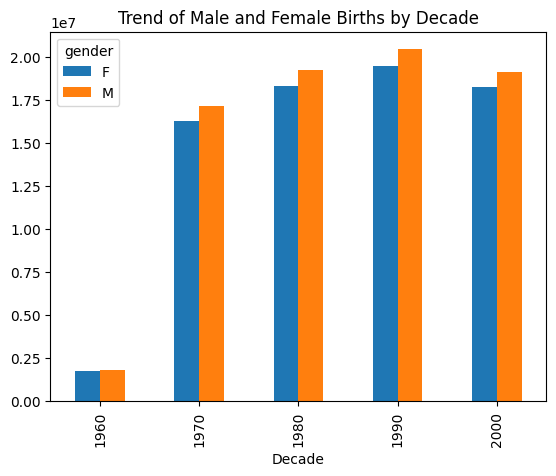

In [59]:
# Group the data by 'Decade' and 'gender', then calculate the sum of births
gender_decade_births = df.groupby(['Decade', 'gender'])['births'].sum().reset_index()

# Pivot the results to have 'Decade' as index and 'gender' as columns
births_pivot = gender_decade_births.pivot(index='Decade', columns='gender', values='births')

# Save the pivot table to a CSV file
births_pivot.to_csv('/content/births.csv')

# Plot the trend
births_pivot.plot(kind='bar', title='Trend of Male and Female Births by Decade')

# Return the pivot table for display
births_pivot


Q.5: **To remove outliers from dataset following techinque to include only those values that fall within 5 standard deviations from the mean.This is a common statistical technique used to focus on the central tendency of the data while excluding extreme values. Use this technique to remove outliers.**


In [60]:
# Step 1: Load the dataset
df = pd.read_csv('/content/cleaned birth.csv')

# Step 2: Check for missing values in the 'births' column
if df['births'].isnull().sum() > 0:
    # Handle missing values (e.g., imputation or exclusion)
    df = df.dropna(subset=['births'])

# Step 3: Calculate mean and standard deviation of the birth counts
mean_births = df['births'].mean()
std_births = df['births'].std()

# Step 4: Identify outliers
lower_bound = mean_births - 5 * std_births
upper_bound = mean_births + 5 * std_births
is_not_outlier = df['births'].between(lower_bound, upper_bound)

# Step 5: Remove outliers
df_clean = df[is_not_outlier]

# Optional Step 6: Save the cleaned data to a new CSV file
df_clean.to_csv('//content/cleaned birth.csv', index=False)

print(f'Original dataset size: {len(df)}, Cleaned dataset size: {len(df_clean)}')

Original dataset size: 15067, Cleaned dataset size: 15067


Q.6: **Plot births by weekday for several decades. Write down your observation**.

In [61]:
import pandas as pd

# Load the dataset
df_births = pd.read_csv('/content/cleaned birth.csv')

# Convert 'year' to a datetime object to extract the day of the week and decade
df_births['date'] = pd.to_datetime(df_births[['year', 'month', 'day']], errors='coerce')

# Drop rows with NaT in 'date' column which resulted from 'day' column having invalid days like 99
df_births.dropna(subset=['date'], inplace=True)

# Extract the weekday name
df_births['weekday'] = df_births['date'].dt.day_name()

# Extract the decade
df_births['decade'] = (df_births['year'] // 10) * 10

# Aggregate total births by weekday for each decade
births_by_weekday_decade = df_births.pivot_table(values='births', index='weekday', columns='decade', aggfunc='sum')

births_by_weekday_decade


decade,1960,1970,1980
weekday,,,
Friday,531220,4992508,5069502
Monday,526638,4895418,4949739
Saturday,483710,4392927,4214867
Sunday,451604,4154367,4041017
Thursday,517742,4903588,5013476
Tuesday,549754,5090433,5173612
Wednesday,537910,4949892,5045584


**Q#6 Observations**:

1. There is a noticeable trend across the decades where the number of births on weekends (Saturday and Sunday) is consistently lower compared to weekdays.

2. The highest number of births tends to occur on Tuesdays and Fridays, while the lowest numbers are observed on Sundays.

3. This pattern may suggest a preference for planned deliveries on weekdays, possibly due to the availability of medical staff and parents' preference for weekday births.

4. There's an overall increase in births from the 1960s through the 1980s, reflecting the population growth during this period.

Q.7: **Group the data by month and day separately**

In [62]:
# Group the data by month and day separately
# Since 'day' has invalid entries like 99, we'll exclude those by working with the 'date' column

# Extract month and day from 'date'
df_births['month'] = df_births['date'].dt.month
df_births['day_of_month'] = df_births['date'].dt.day

# Group by month and calculate the total number of births for each month
births_by_month = df_births.groupby('month')['births'].sum()

# Group by day of the month and calculate the total number of births for each day
# This might include days across all months, so the distribution will be less meaningful
births_by_day_of_month = df_births.groupby('day_of_month')['births'].sum()

births_by_month, births_by_day_of_month


(month
 1     5759165
 2     5362585
 3     5868140
 4     5560775
 5     5785220
 6     5758571
 7     6220295
 8     6309764
 9     6205972
 10    6055372
 11    5695273
 12    5904376
 Name: births, dtype: int64,
 day_of_month
 1     2286854
 2     2303168
 3     2309087
 4     2286588
 5     2296951
 6     2308073
 7     2314081
 8     2322376
 9     2315055
 10    2327197
 11    2319561
 12    2322956
 13    2290896
 14    2335551
 15    2333426
 16    2332456
 17    2335458
 18    2334949
 19    2331183
 20    2337631
 21    2329563
 22    2317711
 23    2305174
 24    2290500
 25    2283975
 26    2300208
 27    2314088
 28    2328630
 29    2189092
 30    2141690
 31    1341380
 Name: births, dtype: int64)

Q.8: **Focusing on the month and day only, you have a time series reflecting the average number of births by date of the year. From this, plot the data**.

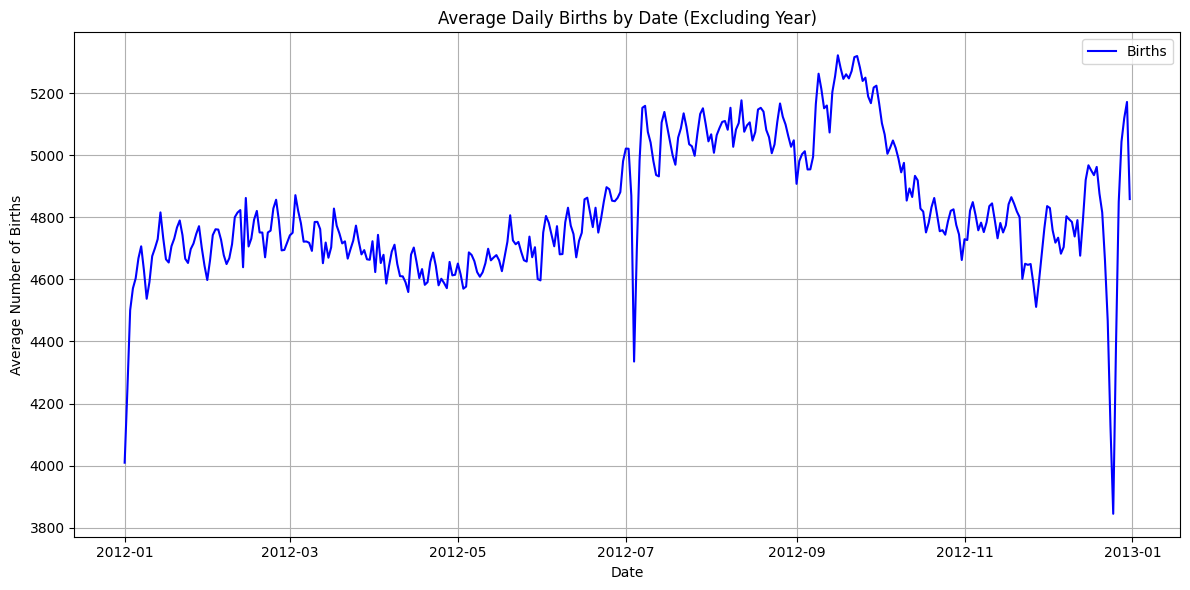

(None, '/content/average daily births.PNG')

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from CSV file
data = pd.read_csv('/content/cleaned birth.csv')

# Check the first few rows of the dataframe
data.head()
# Since we're focusing on month and day only, we need to remove entries with missing days
data = data.dropna(subset=['day'])

# Convert the 'day' column to int as it was read as float due to NaNs
data['day'] = data['day'].astype(int)

# We're only interested in the month and day for plotting the average number of births
# Group the data by month and day and then calculate the mean of births
grouped_data = data.groupby(['month', 'day']).births.mean().reset_index()

# Now create a date range for a non-leap year (e.g., 2012) to use in plotting
dates = pd.date_range('2012-01-01', '2012-12-31').to_series()
dates = dates[~((dates.dt.month == 2) & (dates.dt.day == 29))]

# Merge the averaged data with the dates
# This ensures that the data aligns with the dates correctly, excluding February 29
merged_data = pd.DataFrame({
    'date': dates.values,
    'month': dates.dt.month,
    'day': dates.dt.day
})
merged_data = merged_data.merge(grouped_data, on=['month', 'day'], how='left')

# Set date as the index
merged_data.set_index('date', inplace=True)

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(merged_data.index, merged_data['births'], label='Births', color='blue')
plt.title('Average Daily Births by Date (Excluding Year)')
plt.xlabel('Date')
plt.ylabel('Average Number of Births')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save the plot to a file
plt_path = '/content/average daily births.PNG'
plt.savefig(plt_path)
plt.show(), plt_path
